In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25)
fc, pc, tc = data_instance.create_dataset(100, 2, [100], [0.1], True)

In [3]:
import torch
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model_diag = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_diag.set_device(device)

In [6]:
model_diag.set_test_data(tc)

In [7]:
model_diag.train_diagonal()

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:137: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403246168/work/aten/src/ATen/native/TensorShape.cpp:3637.)
  + posterior_mean.T @ torch.linalg.inv(posterior_diag) @ posterior_mean)


Epoch:0, Loss: 1.3314932126265306
Epoch:1, Loss: 1.4439427542263235
Epoch:2, Loss: 1.4457860611002717
Epoch:3, Loss: 1.4323260877539032
Epoch:4, Loss: 1.4225174379196635
Epoch:5, Loss: 1.4298366001924403
Epoch:6, Loss: 1.411514729197824
Epoch:7, Loss: 1.4048721033744327
Epoch:8, Loss: 1.4019043249840333
Epoch:9, Loss: 1.4076008368986908
Epoch:10, Loss: 1.3937608612612125
Epoch:11, Loss: 1.3842928639821155
Epoch:12, Loss: 1.3921172132230106
Epoch:13, Loss: 1.4017440226608078
Epoch:14, Loss: 1.374928278395255
Epoch:15, Loss: 1.3733952307295128
Epoch:16, Loss: 1.3729488548834456
Epoch:17, Loss: 1.360173874155064
Epoch:18, Loss: 1.376971065467396
Epoch:19, Loss: 1.3827443122455552


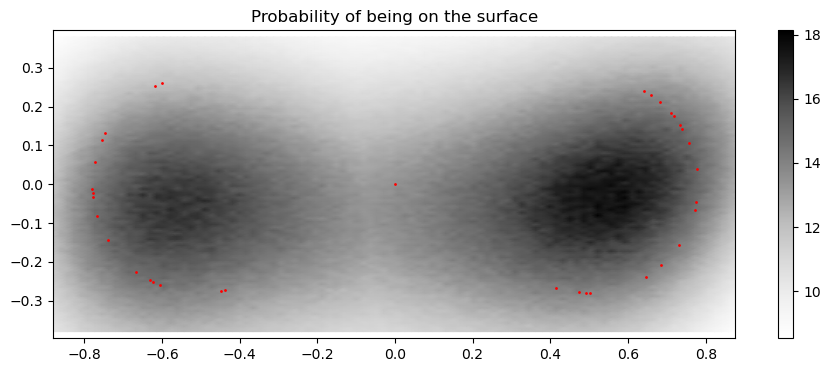

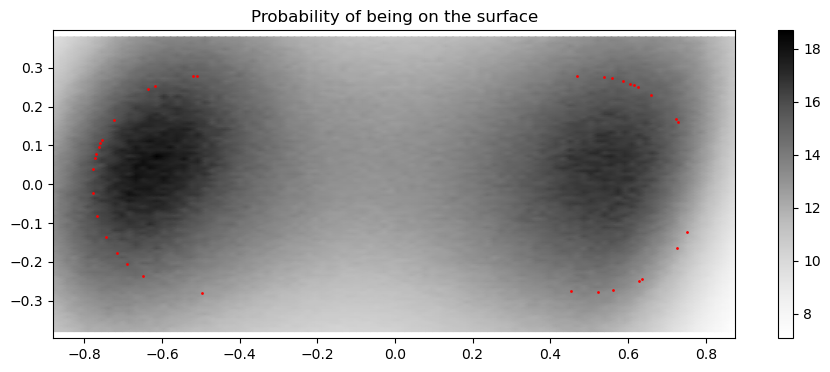

In [8]:
model_diag.predict()

In [9]:
model_diag.set_test_data(pc[:2, :])

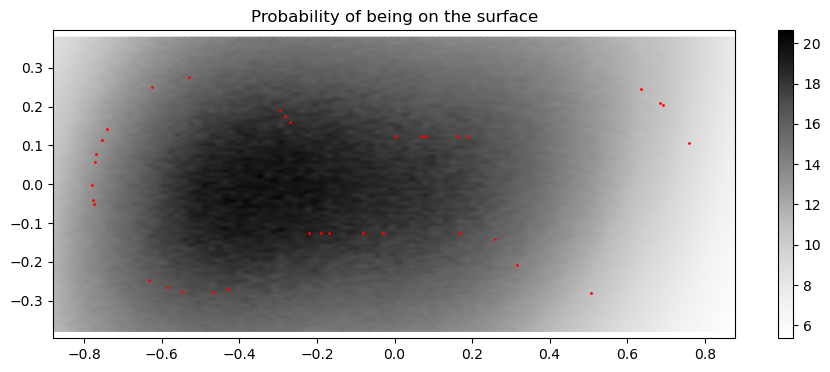

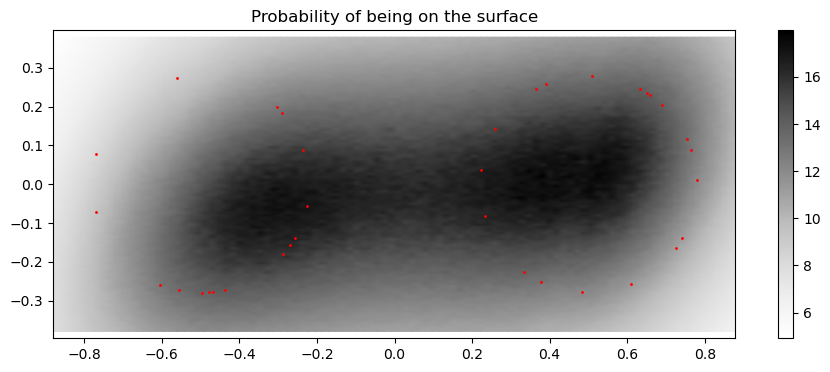

In [10]:
model_diag.predict()

In [22]:
model_chol = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [23]:
model_chol.set_device(device)

In [24]:
model_chol.train_cholesky(num_epochs=20, learning_rate=0.0002)

Epoch:0, Loss: 230.22411779256967
Epoch:1, Loss: 80.24263048454151
Epoch:2, Loss: 51.754055023410395
Epoch:3, Loss: 163.20915310201113
Epoch:4, Loss: 31.403753274997886
Epoch:5, Loss: -191.2488058534707
Epoch:6, Loss: 14.173129899933969
Epoch:7, Loss: -371.41892830350196
Epoch:8, Loss: 79.70317494577459
Epoch:9, Loss: 7.614085004655438
Epoch:10, Loss: 88.98730768041182
Epoch:11, Loss: 47.11856175483524
Epoch:12, Loss: 196.78233080721915
Epoch:13, Loss: -251.55488132084253
Epoch:14, Loss: 97.96885092545409
Epoch:15, Loss: 32.169062968621546
Epoch:16, Loss: 70.51321817334875
Epoch:17, Loss: 42.102814730082095
Epoch:18, Loss: 21.338927860143414
Epoch:19, Loss: 55.366383451306106


In [25]:
model_chol.set_test_data(tc)

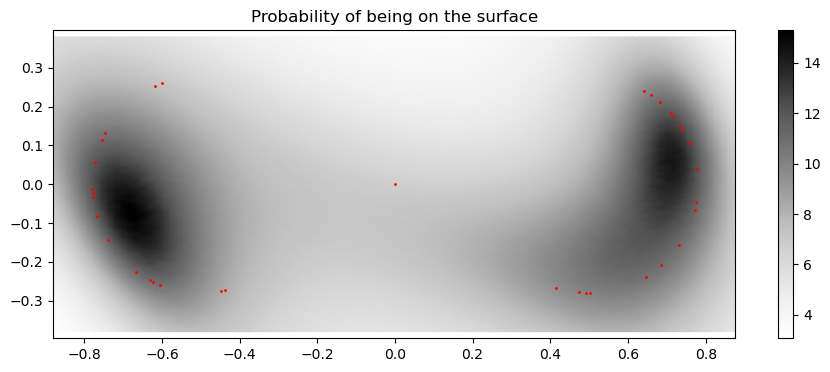

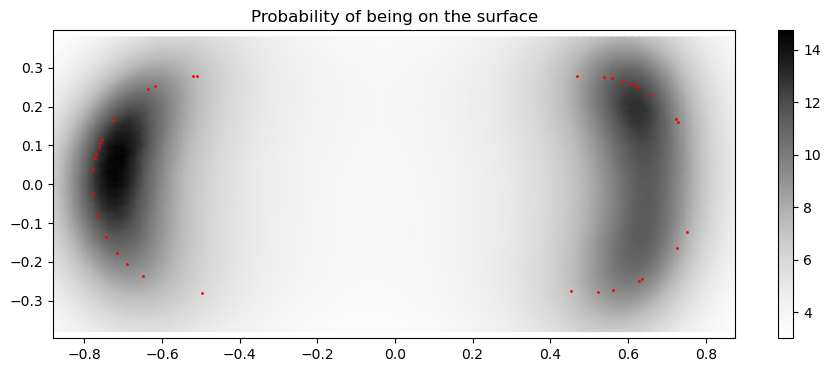

In [26]:
model_chol.predict()

In [27]:
model_chol.set_test_data(pc[:2, :])

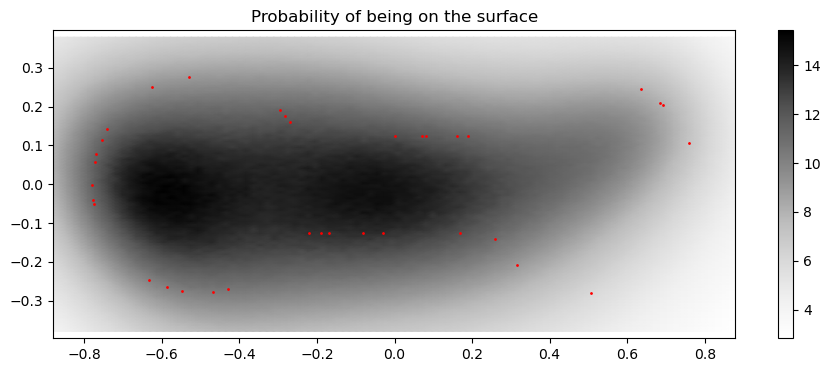

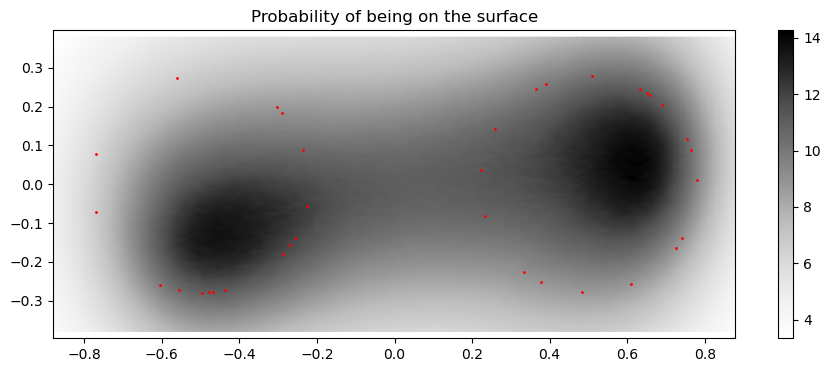

In [28]:
model_chol.predict()